<a id='toc'></a>

# Table of content
Dataset: <br>
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

[Conclusions](#conclusions)

- [Libraries](#libraries)
- [Exploration analysis](#exploration_analysis)

<a id='conclusions'></a>

# Conclusions

**`1.`** xxx

**`2.`** xxx

**`3.`** xxx

<a id='libraries'></a>

# Libraries

In [123]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # metoda częstościowa
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold

from time import time

random_state=2023

<a id='Exploratory_analysis'></a>

# Exploratory analysis

In [125]:
# import danych i podgląd
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [126]:
# number of duplicates
len(df)-len(df.drop_duplicates())

240

In [127]:
df.drop_duplicates(inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [128]:
# wydruk nazw kolumn
for i in df.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [129]:
dict_colums_names = {
                    "fixed acidity": "kwasowość_stała",
                    "volatile acidity": "kwasowość_lotna",
                    "citric acid": "kwas_cytrynowy",
                    "residual sugar": "cukier_resztkowy",
                    "chlorides": "chlorki",
                    "free sulfur dioxide": "wolny_dwutlenek_siarki",
                    "total sulfur dioxide": "całkowity_dwutlenek_siarki",
                    "density": "gęstość",
                    "pH": "pH",
                    "sulphates": "siarczany",
                    "alcohol": "alkohol",
                    "quality": "jakość",    
                    }

In [130]:
df.rename(columns=dict_colums_names, inplace=True)
df


,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [131]:
# sprawdzenie czy mamy NaN
df.isna().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [132]:
# sprawdzenie czy mamy nulle
df.isnull().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [133]:
# sprawdzenie typu kolumn
df.dtypes

kwasowość_stała               float64
kwasowość_lotna               float64
kwas_cytrynowy                float64
cukier_resztkowy              float64
chlorki                       float64
wolny_dwutlenek_siarki        float64
całkowity_dwutlenek_siarki    float64
gęstość                       float64
pH                            float64
siarczany                     float64
alkohol                       float64
jakość                          int64
dtype: object

In [134]:
# sprawdzenie statystyk
df.describe().apply(lambda x: round(x, 2))

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kwasowość_stała             1359 non-null   float64
 1   kwasowość_lotna             1359 non-null   float64
 2   kwas_cytrynowy              1359 non-null   float64
 3   cukier_resztkowy            1359 non-null   float64
 4   chlorki                     1359 non-null   float64
 5   wolny_dwutlenek_siarki      1359 non-null   float64
 6   całkowity_dwutlenek_siarki  1359 non-null   float64
 7   gęstość                     1359 non-null   float64
 8   pH                          1359 non-null   float64
 9   siarczany                   1359 non-null   float64
 10  alkohol                     1359 non-null   float64
 11  jakość                      1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


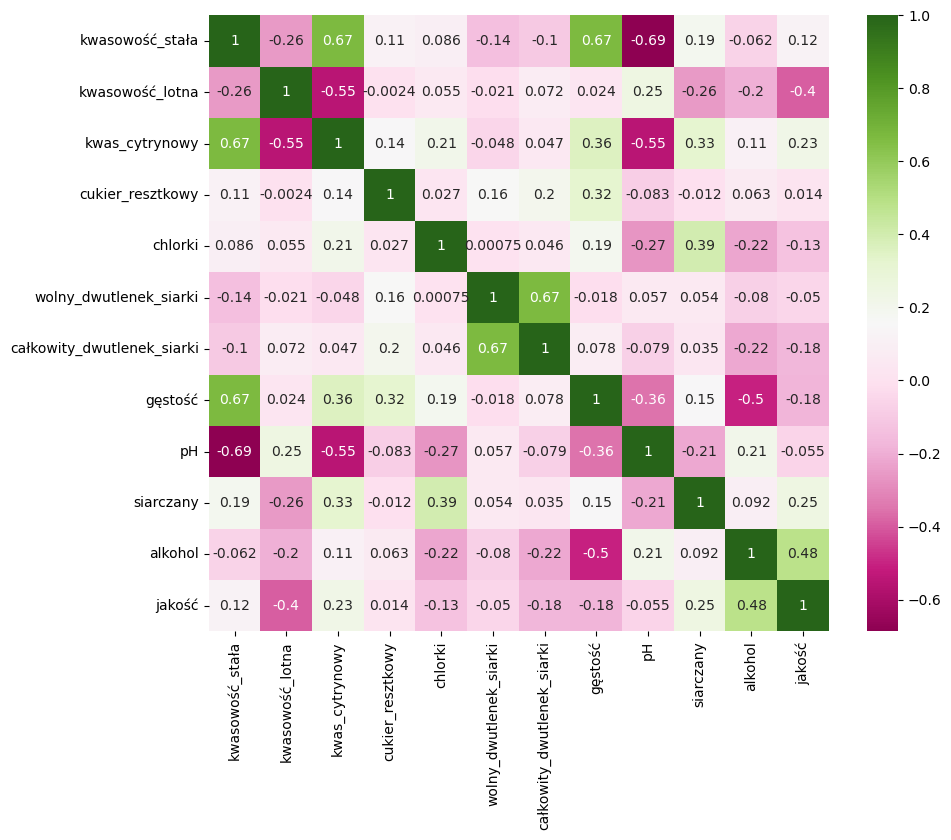

In [136]:
# sprawdzenie korelacji
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

# najwieksza pozytywna korelacje na jakosc wina ma alkohol
# najwieksza negatywna korelacje na jakosci wina ma kwasowosc lotna

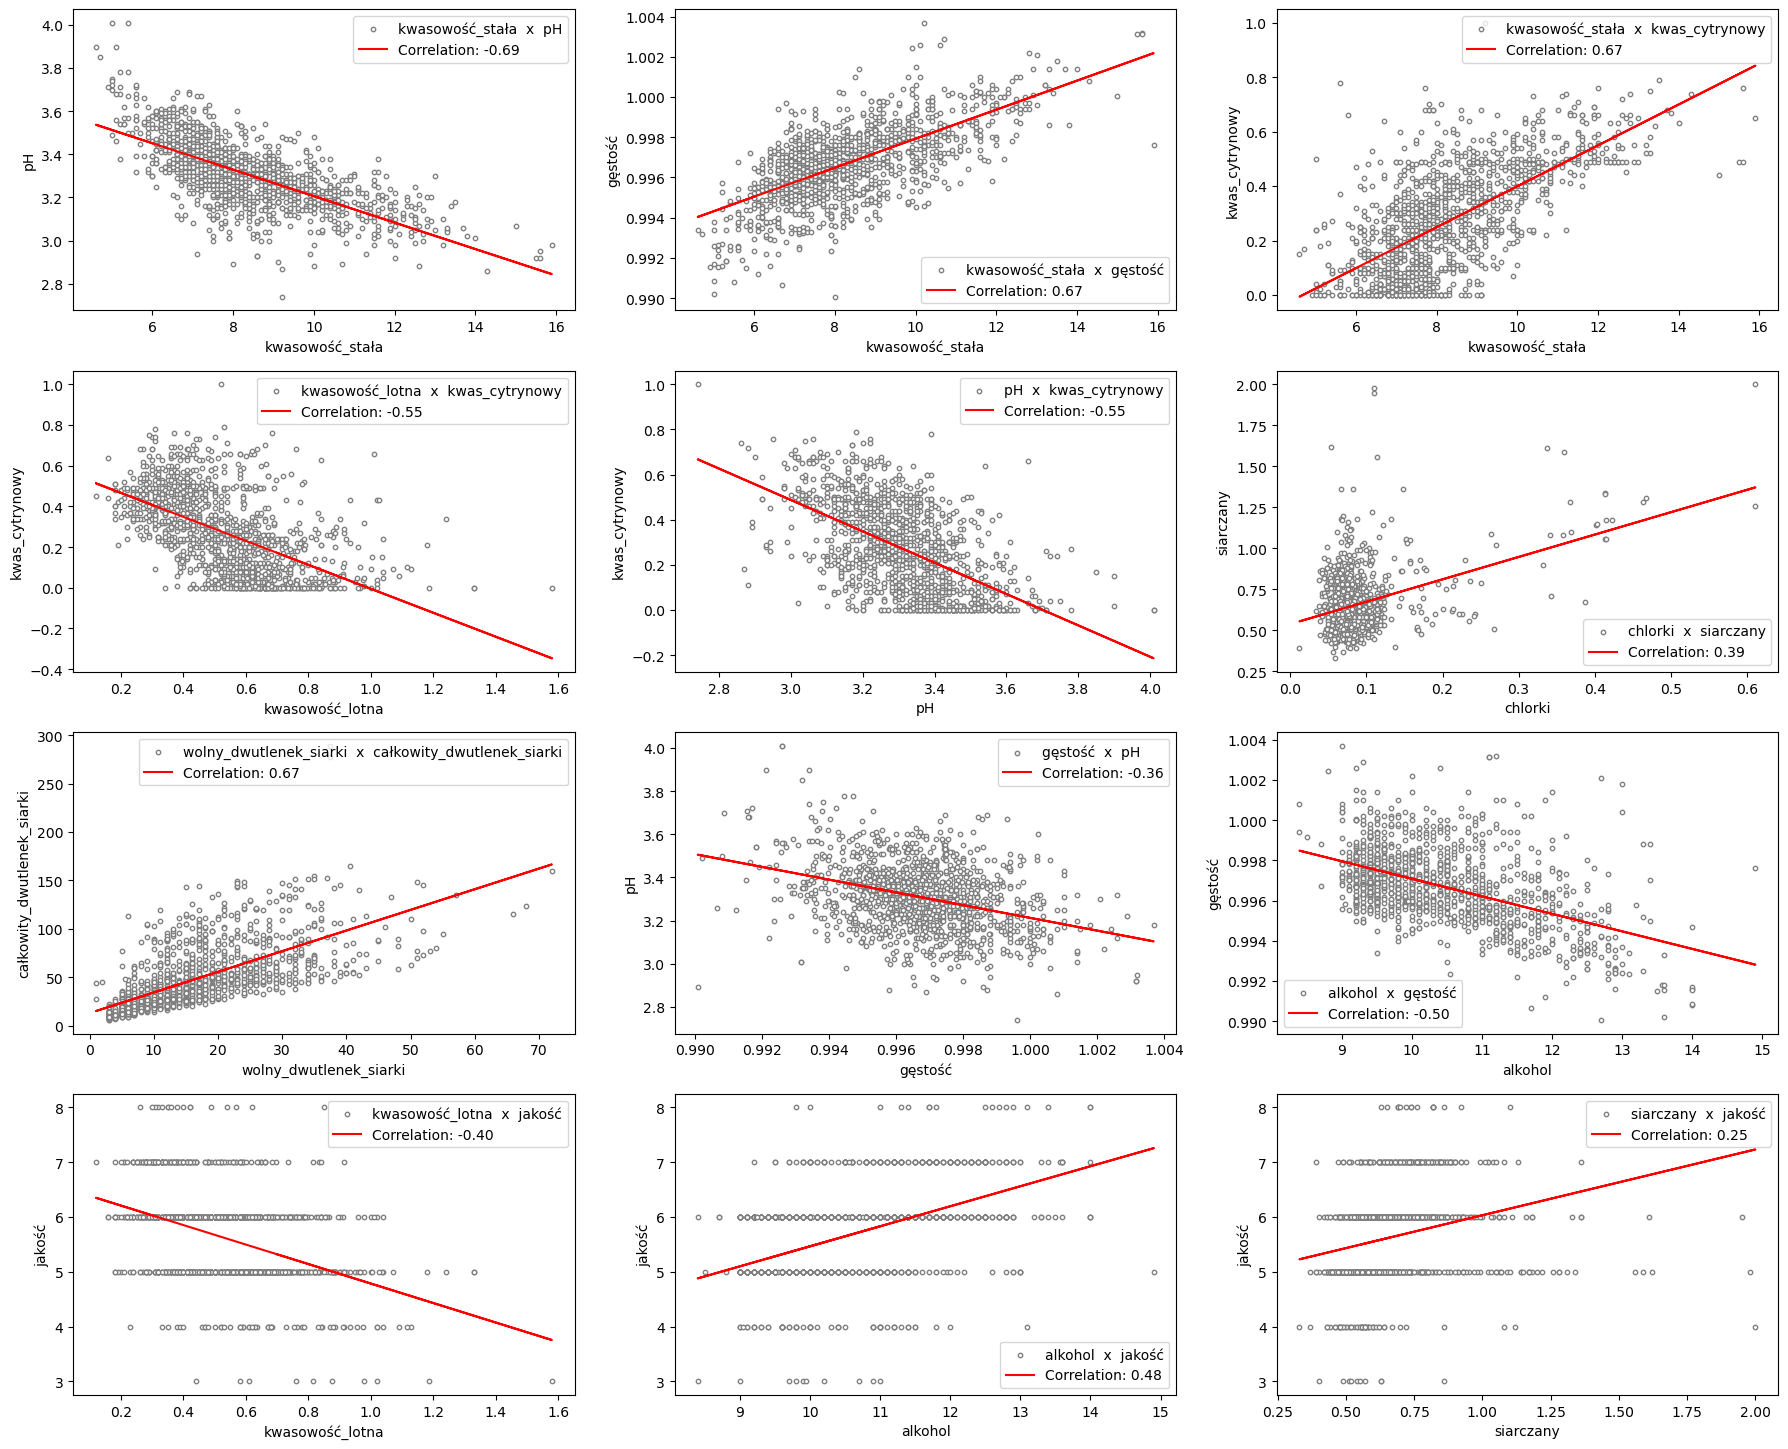

In [137]:
# narysowanie pary wykresów z największą korelacją
data = [
        (df["kwasowość_stała"], df["pH"], 'kwasowość_stała  x  pH'),
        (df["kwasowość_stała"], df["gęstość"], 'kwasowość_stała  x  gęstość'),
        (df["kwasowość_stała"], df["kwas_cytrynowy"], 'kwasowość_stała  x  kwas_cytrynowy'),
        
        (df["kwasowość_lotna"], df["kwas_cytrynowy"], 'kwasowość_lotna  x  kwas_cytrynowy'),
        (df["pH"], df["kwas_cytrynowy"], 'pH  x  kwas_cytrynowy'),
        (df["chlorki"], df["siarczany"], 'chlorki  x  siarczany'),
        
        (df["wolny_dwutlenek_siarki"], df["całkowity_dwutlenek_siarki"], 'wolny_dwutlenek_siarki  x  całkowity_dwutlenek_siarki'),
        (df["gęstość"], df["pH"], 'gęstość  x  pH'),
        (df["alkohol"], df["gęstość"], 'alkohol  x  gęstość'),
        
        (df["kwasowość_lotna"], df["jakość"], 'kwasowość_lotna  x  jakość'),
        (df["alkohol"], df["jakość"], 'alkohol  x  jakość'),
        (df["siarczany"], df["jakość"], 'siarczany  x  jakość'),
        ]


fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9),
      (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize = (22, 18), dpi=100)

for ax, (x, y, label) in zip((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12), data):
    ax.scatter(x, y, label=label, c='white', edgecolors="grey", s=10)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='red', label='Correlation: {:.2f}'.format(np.corrcoef(x, y)[0, 1]))
    ax.legend()

plt.show()



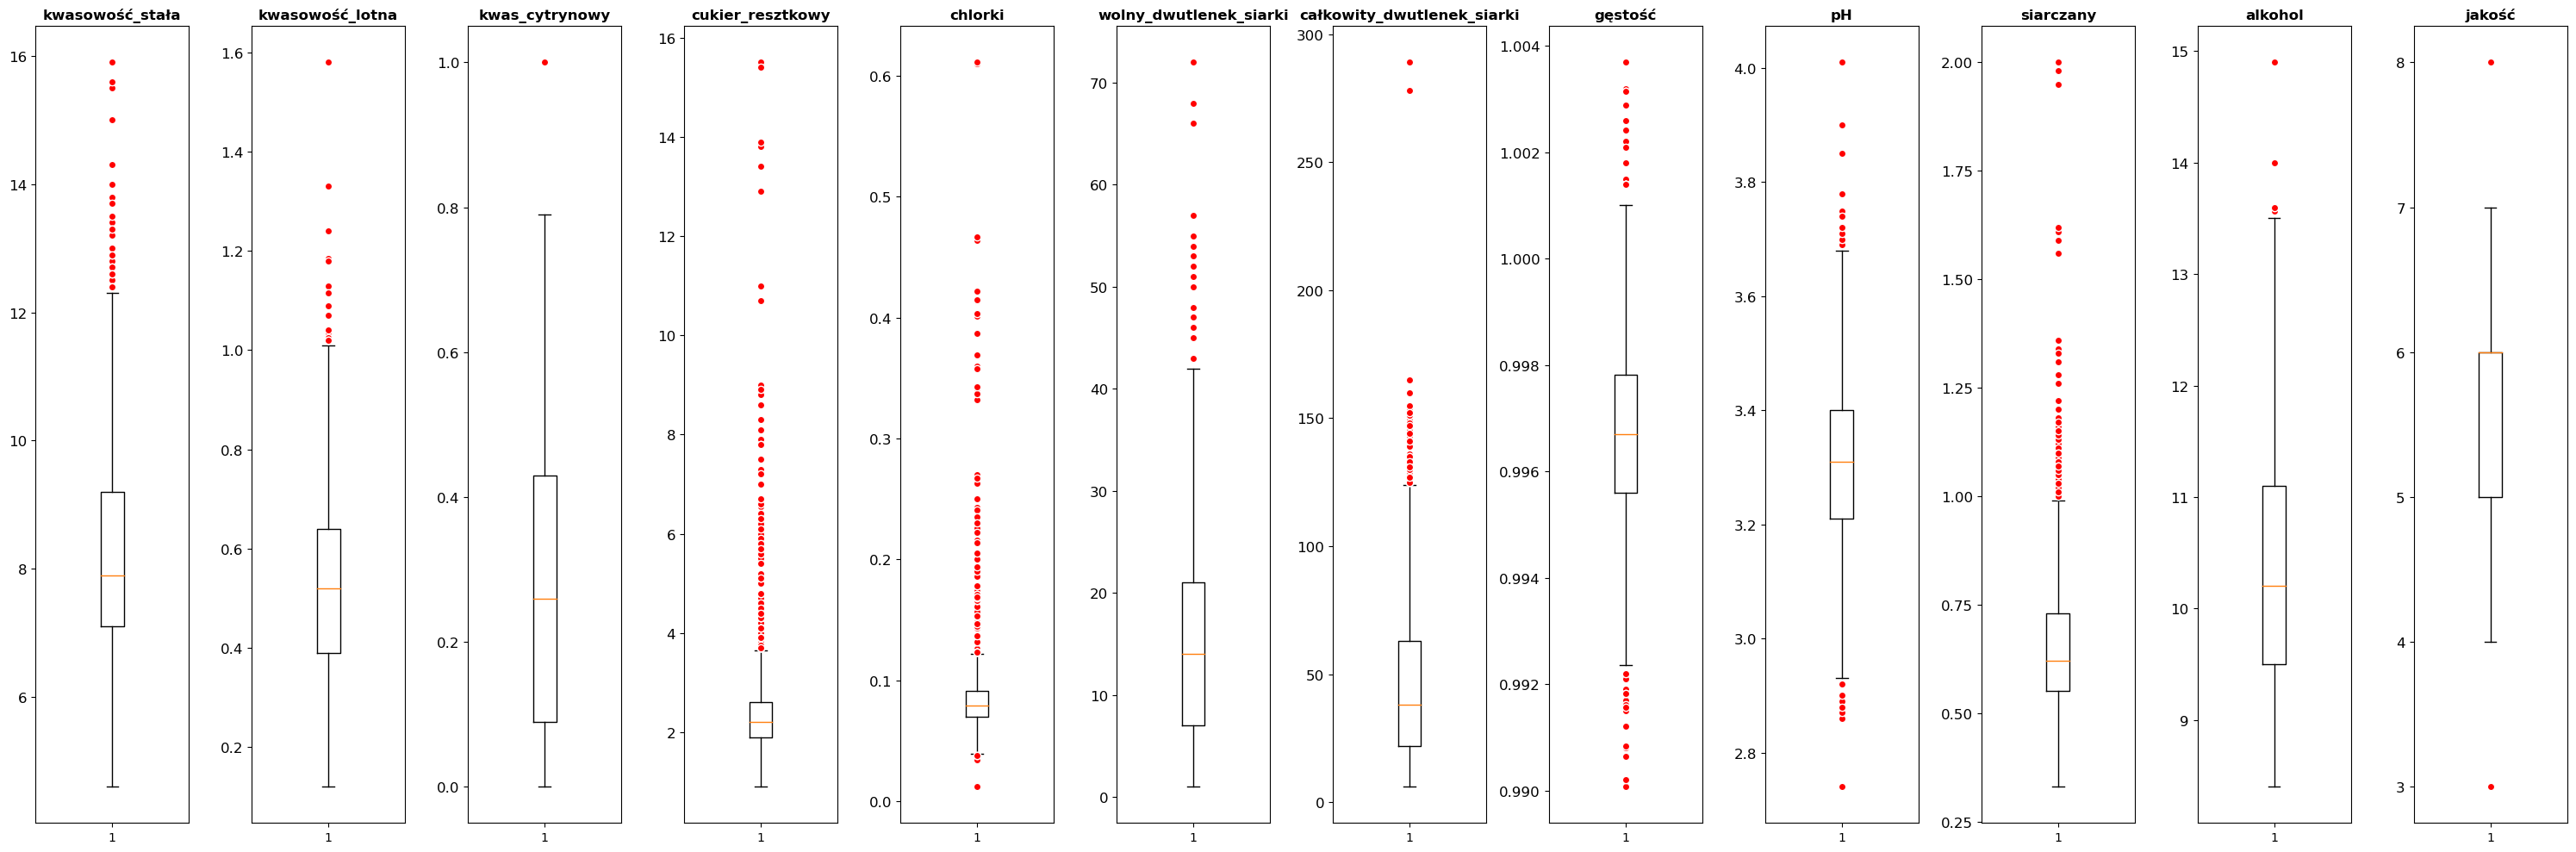

In [138]:
#box plot dla kazdej kolumny 
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [139]:
for i in df.columns:
    nbins = 80
    fig = px.histogram(df, x=i,
                    marginal="box",
                    width=800, height=500,
                    title=i,
                    color_discrete_sequence=['#FF6692'],
                    nbins = nbins)


    fig.update_layout(
        font_family="Ubuntu",
        font_color="black",
        title_font_family="Ubuntu",
        title_font_color="black",
        title_font_size=25,
        yaxis_title_text="Ilość",
        xaxis_title_text=i
    )

    fig.show()

In [140]:
# powyższe wykresy nie wyswietlaja sie na repozytorium

<a id='wnioski_po_eksploracji_danych'></a>

<span style="color:grey">

### Wnioski po eksploracji danych
- wydaje się, że całkowity dwutlenek siarki zachowuje się bardzo podobnie jak wolny dwutlenek siarki i ze mozna zrezygnowac z jednej z tych cech
- inne cechy, które być może warto wykluczyć ze względu na niskie zróżnicowanie zmiennej lub koncentrację wokół mody:
    - chlorki
    - cukier resztowy
    - gęstość
- najwiekszy wplyw na jakosc wina ma poziom alkoholu. wysoki poziom alkoholu oznacza, ze winogrono bylo dobrze naslonecznione i zawiralo duzo cukru
- pozytywny wplyw poza alkoholem, na jakosc wina maja:
    - siarczany
    - kwas cytrynowy
- negatywny wplyw na jakosc wina kwasowosc lotna
- może mieć sens podzielenie targetu:
    - poniżej progu kontroli jakości: 0-4
    - wina standardowe: 5-6
    - wina wysokiej jakości: 7-10
- accuracy na poziomie 68% nie jest miar
<span>


<a id='Metric_and_validation'></a>

# Metric and validation

### Metric

Dataset is highly unbalanced - it cointains relatively small amount of bad and great wines compared to average. The most suitable metric would be `F-beta score`. It is derivative of F-score measure. If we set **beta** parameter equal to 2.0 it means that recall is more important than precision. It is imortant to mark bad quality wines, becasue it cannot be sold.

### Validation

Data distribution is unbalanced - Stratified K Fold can be useful, because it allows to maintain the same proportion of samples

<a id='basic_model'></a>

# Basic model

In [141]:
# quality distribution
df.groupby("jakość")["jakość"].count()

jakość
3     10
4     53
5    577
6    535
7    167
8     17
Name: jakość, dtype: int64

In [142]:
# change outcome classes
df.loc[df['jakość'] <= 4] = 1
df.loc[df['jakość'] == 5] = 2
df.loc[df['jakość'] == 6] = 2
df.loc[df['jakość'] >= 7] = 3

In [143]:
# train/validation $ test split, including stratify parameter to keep proportions
X = df.iloc[:, :-1]
y = df.iloc[:, -1:].to_numpy().ravel()
test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    stratify=df["jakość"])

In [144]:
def run_model(model, X, y, cross_val):
    """
    function that train model
    input:
            model: estimator (e.g. random forest, XGBoost)
            X: training set
            y: target set
            cross_val: kind of validation
    output/print:
            average results from every fold, incuding:
                fbeta,
                f1,
                recall,
                precision
            cross_val_time: total time
    """

    model_name = type(model).__name__

    start = time()
    
    fbeta_scorer = make_scorer(fbeta_score, beta=2, average='micro') 
    fbeta = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)

    f1 = cross_val_score(model, X, y, cv=cross_val, scoring='f1_micro')
    
    recall_scorer = make_scorer(recall_score, average='micro') 
    recall = cross_val_score(model, X, y, cv=cross_val, scoring=recall_scorer)
    
    precision_scorer = make_scorer(precision_score, average='micro') 
    precision = cross_val_score(model, X, y, cv=cross_val, scoring=precision_scorer)   

    end = time()
    cross_val_time = end-start
    
    print(f"{model_name} || fbeta: {np.mean(fbeta):.2f}, f1: {np.mean(f1):.2f}, recall: {np.mean(recall):.2f}, precision: {np.mean(precision):.2f}, time: {round(cross_val_time, 2)}") 

In [145]:
# function that show features important on the chart
def plot_feature_importances(model, features_list, ax):
    """
    function that present features important
    input:
            model: estimator (e.g. random forest, XGBoost)
            features_list: training set
            y: target set
            cross_val: kind of validation
    output/print:
            average results from every fold, incuding:
                fbeta,
                f1,
                recall,
                precision, 
                accuracy
            cross_val_time: total time
    """
    model_name = type(model).__name__
    skplt.estimators.plot_feature_importances(model,
                                              feature_names=df[features_list].columns,
                                              title=f'{model_name} - feature importances',
                                              ax=ax)
    plt.xticks(rotation=90)

In [146]:
# defining folds and models
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

DT_model = DecisionTreeClassifier(random_state=random_state)
RF_model = RandomForestClassifier(random_state=random_state)
XGB_model = XGBClassifier(random_state=random_state, eval_metric='mlogloss')
KNN_model = KNeighborsClassifier()

models = [DT_model, RF_model, XGB_model, KNN_model]

In [147]:
# quick evaluation
for model in models:
    run_model(model, X_train, y_train, skf)

DecisionTreeClassifier || fbeta: 1.00, f1: 1.00, recall: 1.00, precision: 1.00, time: 0.06
RandomForestClassifier || fbeta: 1.00, f1: 1.00, recall: 1.00, precision: 1.00, time: 1.68
XGBClassifier || fbeta: 1.00, f1: 1.00, recall: 1.00, precision: 1.00, time: 1.57
KNeighborsClassifier || fbeta: 1.00, f1: 1.00, recall: 1.00, precision: 1.00, time: 0.23
